Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install transformers

In [3]:
!pip install datasets

In [4]:
!pip install scikit-learn

In [5]:
!pip install vncorenlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645933 sha256=dde8507675c2f0e234c55ad5333f356e9ae39cb89f731cfabbde57d612d26855
  Stored in directory: /root/.cache/pip/wheels/80/ad/d4/9e1a0939f63331a3898f2a951a368bbf0d69f7b027cae4d66b
Successfully built vncorenlp


In [6]:
!pip install py_vncorenlp

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.9 MB/s eta 0:00:00
  Created wheel for py_vncorenlp: filename=py_vncorenlp-0.1.4-py3-none-any.whl size=4304 sha256=b1f960452d5c180bf645d23148f1a3594533a3f1ee69d313b50d84ddd1beecb4
  Stored in directory: /root/.cache/pip/wheels/6d/2d/d6/158260bfd6820d144535857b80cc112bee5c3aa6d81b6dc049
Successfully built py_vncorenlp


In [7]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 6.8 MB/s eta 0:00:00


In [8]:
!pip install autokeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.7/122.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.8 MB/s eta 0:00:00


## Library Setup

In [9]:
import torch
from transformers import AutoTokenizer, AutoModel,AutoModelForSequenceClassification
# Tải tokenizer và mô hình
model_name = "NlpHUST/electra-base-vn"
tokenizer = AutoTokenizer.from_pretrained(model_name)
# Tải mô hình ELECTRA và thêm lớp phân loại với 3 nhãn
model = AutoModel.from_pretrained(model_name)
# model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3) #electra_model

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/411k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/535M [00:00<?, ?B/s]

In [10]:
import numpy as np
from unidecode import unidecode

import matplotlib.pyplot as plt
import seaborn as sns
import collections
from wordcloud import WordCloud

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [11]:
#Set up vncorelp to use in this assignment
import logging
from vncorenlp import VnCoreNLP
import py_vncorenlp

In [12]:
# Kiểm tra nhanh tokenizer
sample = "Bạn đúng là đồ khốn"
tokens = tokenizer(sample)
print(tokens)
# input_ids     	Mã số tương ứng với từ/ngữ trong câu
# token_type_ids	Xác định câu A/B (toàn 0 nếu chỉ 1 câu)
# attention_mask	Đánh dấu token nào là "thật" hay bị padding

{'input_ids': [2, 1588, 524, 11, 825, 4878, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}


In [13]:
#  xử lý dữ liệu bình luận, tập huấn luyện, chia train/test, v.v.
import numpy as np
import pandas as pd
# Để đánh giá mô hình sau khi fine-tune ELECTRA
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [14]:
!cp '/content/drive/MyDrive/IE304/scripts/abbreviations.py' '/content/abbreviations.py'

In [15]:
!ls

abbreviations.py  drive  sample_data


In [16]:
from abbreviations import Abb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import pandas as pd

class Abb():
    word = set()
    dic = dict()
    def __init__(self):
        df = pd.read_csv('/content/drive/MyDrive/IE304/Abbreviations.csv')
        for abb,nor in zip(df['Abbreviations'],df['Normalization']):
            ls = abb.split(',')
            for wor in ls:
                self.word.add(wor)
                self.dic[wor] = nor
    def rep(self,text):
        if text in self.word:
            return self.dic[text]
        else:
            return text

In [18]:
# Import thư viện
import py_vncorenlp

#py_vncorenlp.download_model(save_dir='/content/drive/MyDrive/Sarcasm/vnNLP')
py_vncorenlp.download_model(save_dir='/content/')

# Load VnCoreNLP from the local working folder that contains both `VnCoreNLP-1.2.jar` and `models`
# model = py_vncorenlp.VnCoreNLP(save_dir='/content/drive/MyDrive/Sarcasm/vnNLP')
model_vncorenlp = py_vncorenlp.VnCoreNLP(save_dir='/content/')


# Load data

In [19]:
# link_data = '/content/drive/MyDrive/IE304/Dataset.csv'
# link_data = '/content/drive/MyDrive/IE304/dataset_final_2.csv'
link_data = '/content/drive/MyDrive/IE304/merged_dataset.csv'
data = pd.read_csv(link_data)
data.head ()

,Id,Label,Comment
0,1,0,"Slayder, GAM cần anh."
1,2,0,"Dạ mỗi khi Gam cần, em luôn sẵn sèng!!"
2,3,0,"sờ ty lè k chỉ nhảy qua tường, sờ ty lè nhảy p..."
3,4,0,Mê cái cách anh này nhảy E
4,5,0,Chúc mừng\nGam đã có kỳ chuyển nhượng thành công


# Xóa mẫu chưa gán nhãn

In [20]:
index = data[data['Label'].isnull() == True].index
data.drop(index, inplace= True)

In [21]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14803 entries, 0 to 14802
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       14803 non-null  int64 
 1   Label    14803 non-null  int64 
 2   Comment  14803 non-null  object
dtypes: int64(2), object(1)
memory usage: 347.1+ KB


# Kiểm tra nhãn

In [22]:
values = set()
data['Label'].apply(lambda x: values.add(x))
print(values)

{0, 1, 2}


# Preprocessing - Tiền xử lý dữ liệu

In [23]:
# Kiểm tra số dòng trùng
print(f"Số dòng trùng: {data.duplicated().sum()}")

Số dòng trùng: 0


In [24]:
#Đưa các từ lowercase
data['text'] = data['Comment'].str.lower()
#Loại bỏ dấu câu
character = ['\'','.',',','-',':','"','!','~','?',']','*']
character = set(character)
data['text'] = data['text'].apply(lambda x: ''.join([char for char in x if char not in character]))
data.head()

,Id,Label,Comment,text
0,1,0,"Slayder, GAM cần anh.",slayder gam cần anh
1,2,0,"Dạ mỗi khi Gam cần, em luôn sẵn sèng!!",dạ mỗi khi gam cần em luôn sẵn sèng
2,3,0,"sờ ty lè k chỉ nhảy qua tường, sờ ty lè nhảy p...",sờ ty lè k chỉ nhảy qua tường sờ ty lè nhảy ph...
3,4,0,Mê cái cách anh này nhảy E,mê cái cách anh này nhảy e
4,5,0,Chúc mừng\nGam đã có kỳ chuyển nhượng thành công,chúc mừng\ngam đã có kỳ chuyển nhượng thành công


##Giải nghĩa từ viết tắt

In [25]:

# Giải nghĩa từ viết tắt
abb = Abb()
data['text'] = data['text'].apply(lambda x: ' '.join([abb.rep(word) for word in x.split()]))
data.head()

,Id,Label,Comment,text
0,1,0,"Slayder, GAM cần anh.",slayder gam cần anh
1,2,0,"Dạ mỗi khi Gam cần, em luôn sẵn sèng!!",dạ mỗi khi gam cần em luôn sẵn sèng
2,3,0,"sờ ty lè k chỉ nhảy qua tường, sờ ty lè nhảy p...",sờ ty lè không chỉ nhảy qua tường sờ ty lè nhả...
3,4,0,Mê cái cách anh này nhảy E,mê cái cách anh này nhảy em
4,5,0,Chúc mừng\nGam đã có kỳ chuyển nhượng thành công,chúc mừng gam đã có kỳ chuyển nhượng thành công


##Word segmentation

In [26]:
#Thực hiện Word Segmentation bằng toolkit VNCoreLP
data['text'] = data['text'].apply(lambda x: " ".join(word for word in model_vncorenlp.word_segment(x)))

In [27]:
data.reset_index(inplace = True)
data

,index,Id,Label,Comment,text
0,0,1,0,"Slayder, GAM cần anh.",slayder gam cần_anh
1,1,2,0,"Dạ mỗi khi Gam cần, em luôn sẵn sèng!!",dạ mỗi khi gam cần em luôn sẵn sèng
2,2,3,0,"sờ ty lè k chỉ nhảy qua tường, sờ ty lè nhảy p...",sờ ty lè không_chỉ nhảy qua tường sờ ty lè nhả...
3,3,4,0,Mê cái cách anh này nhảy E,mê cái cách anh này nhảy em
4,4,5,0,Chúc mừng\nGam đã có kỳ chuyển nhượng thành công,chúc_mừng gam đã có kỳ chuyển_nhượng thành_công
...,...,...,...,...,...
14798,14798,10159,0,Tâm Tailor Phạm Trúc Giang,tâm tailor phạm trúc_giang
14799,14799,10189,0,"Hôm nay mình ra toà, Thẩm phán bảo: “Chào ca s...",hôm_nay mình ra toà thẩm_phán bảo “ chào ca_sĩ...
14800,14800,10191,0,"Hôm ra toà, Thẩm phán bảo: “Chào ca sĩ Đoàn Di...",hôm ra toà thẩm_phán bảo “ chào ca_sĩ đoàn di ...
14801,14801,10193,0,Done em BOM,done em bom


##Bỏ Stopword

In [28]:
data_train = []

#Loại bỏ các stopword
link_vn_stopword = '/content/drive/MyDrive/IE304/vietnamese-stopwords.txt'
stop_words = set(line.strip() for line in open(link_vn_stopword))
for sentence in data['text']:
    sen_new = ""
    sen_temp = sentence.split()
    #print(sen_temp)
    for word in sen_temp:
        #print(word,'.')
        if (word not in stop_words):
            sen_new += word + " "
        #print()
    data_train.append(sen_new)

print ("Headlines after Preprocessing")
for i in range (0,20):
  print (f"{i+1}/",data_train[i])

Headlines after Preprocessing
1/ slayder gam cần_anh 
2/ gam sẵn sèng 
3/ sờ ty lè không_chỉ nhảy tường sờ ty lè nhảy phát team 
4/ mê nhảy 
5/ chúc_mừng gam kỳ chuyển_nhượng thành_công 
6/ mê nhảy 
7/ chuẩn thoát pressing luônnn 
8/ ok chúc sơn thành công đường tiếp giờ thì hóng ad mới 
9/ gam đầu_tư đi cửa sân_bay 
10/ trận best gánh 
11/ thằng hankay out hài vãi lồn đôn huấn_luyện_viên tạm vị_trí analyst gam tuyển huấn_luyện_viên chả ảnh_hưởng 
12/ msi xong thank you vị_trí sty1e 
13/ đem shogun đem taki 2 đánh kết_hợp 
14/ thầy sty1e lck hướng_dẫn thằng peyz thằng guma đánh zeri 2 thằng đánh ngu 
15/ dũng phạm se gam giúp thoát pressing 
16/ nghi_thức hiến tế bắt_đầu 
17/ ôi cảm_động hoá_thân thành fan gam khứa hơi anti gam một_chút 
18/ kick ác nhường chỗ tướng_quân 
19/ tao đợi thank you kati mãi 
20/ mong sty1e 


In [29]:
data['Comment'] = data_train
data

,index,Id,Label,Comment,text
0,0,1,0,slayder gam cần_anh,slayder gam cần_anh
1,1,2,0,gam sẵn sèng,dạ mỗi khi gam cần em luôn sẵn sèng
2,2,3,0,sờ ty lè không_chỉ nhảy tường sờ ty lè nhảy ph...,sờ ty lè không_chỉ nhảy qua tường sờ ty lè nhả...
3,3,4,0,mê nhảy,mê cái cách anh này nhảy em
4,4,5,0,chúc_mừng gam kỳ chuyển_nhượng thành_công,chúc_mừng gam đã có kỳ chuyển_nhượng thành_công
...,...,...,...,...,...
14798,14798,10159,0,tâm tailor phạm trúc_giang,tâm tailor phạm trúc_giang
14799,14799,10189,0,hôm_nay thẩm_phán bảo “ chào ca_sĩ đoàn di băn...,hôm_nay mình ra toà thẩm_phán bảo “ chào ca_sĩ...
14800,14800,10191,0,hôm thẩm_phán bảo “ chào ca_sĩ đoàn di băng ”,hôm ra toà thẩm_phán bảo “ chào ca_sĩ đoàn di ...
14801,14801,10193,0,done bom,done em bom


# Data Visualization

## 1. Phân bố nhãn

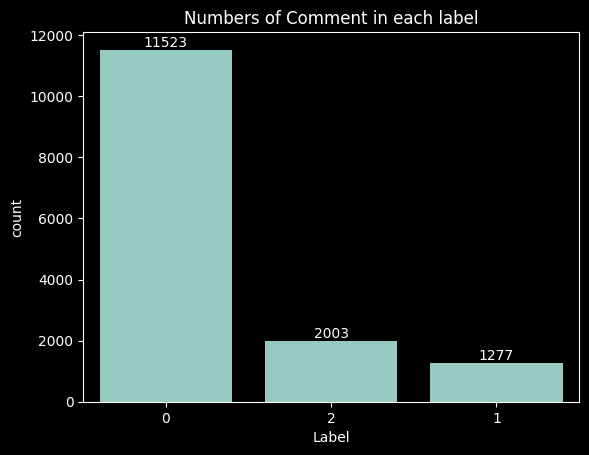

In [30]:
label_name = ['0','1','2']
plt.style.use('dark_background')
ax = sns.countplot(x ="Label", data = data)
plt.xticks (ticks = data['Label'].unique(), labels=label_name)
ax.bar_label (ax.containers[0])
plt.title ("Numbers of Comment in each label")
plt.show ()

In [31]:
#df = data[data['Label']==0]['Comment'].apply(len)
print ("Thống kê về độ dài của comment")
print("Độ dài trung bình của comment:",data['Comment'].apply(len).mean())

print ("Phân bố giá trị của comment: Min =",data['Comment'].apply(len).min(),", Max =",data['Comment'].apply(len).max())

print('-' * 55)
print ("Label 0")
print ("Miền giá trị độ dài: Min =",data[data['Label']==0]['Comment'].apply(len).min(),", Max =",data[data['Label']==0]['Comment'].apply(len).max())
print ("Độ dài trung bình của comment:",data[data['Label']==0]['Comment'].apply(len).mean())

print('-' * 55)
print ("Label 1")
print ("Miền giá trị độ dài: Min =",data[data['Label']==1]['Comment'].apply(len).min(),", Max =",data[data['Label']==0]['Comment'].apply(len).max())
print ("Độ dài trung bình của comment:",data[data['Label']==1]['Comment'].apply(len).mean())

print('-' * 55)
print ("Label 2")
print ("Miền giá trị độ dài: Min =",data[data['Label']==2]['Comment'].apply(len).min(),", Max =",data[data['Label']==0]['Comment'].apply(len).max())
print ("Độ dài trung bình của comment:",data[data['Label']==2]['Comment'].apply(len).mean())

Thống kê về độ dài của comment
Độ dài trung bình của comment: 33.62595419847328
Phân bố giá trị của comment: Min = 0 , Max = 238
-------------------------------------------------------
Label 0
Miền giá trị độ dài: Min = 0 , Max = 213
Độ dài trung bình của comment: 31.408574156035755
-------------------------------------------------------
Label 1
Miền giá trị độ dài: Min = 0 , Max = 213
Độ dài trung bình của comment: 37.17573639540689
-------------------------------------------------------
Label 2
Miền giá trị độ dài: Min = 0 , Max = 213
Độ dài trung bình của comment: 48.066562255285824


In [32]:
data = data[data['Comment'].apply(len) > 0]
data.reset_index(inplace = True)
data

,level_0,index,Id,Label,Comment,text
0,0,0,1,0,slayder gam cần_anh,slayder gam cần_anh
1,1,1,2,0,gam sẵn sèng,dạ mỗi khi gam cần em luôn sẵn sèng
2,2,2,3,0,sờ ty lè không_chỉ nhảy tường sờ ty lè nhảy ph...,sờ ty lè không_chỉ nhảy qua tường sờ ty lè nhả...
3,3,3,4,0,mê nhảy,mê cái cách anh này nhảy em
4,4,4,5,0,chúc_mừng gam kỳ chuyển_nhượng thành_công,chúc_mừng gam đã có kỳ chuyển_nhượng thành_công
...,...,...,...,...,...,...
14674,14798,14798,10159,0,tâm tailor phạm trúc_giang,tâm tailor phạm trúc_giang
14675,14799,14799,10189,0,hôm_nay thẩm_phán bảo “ chào ca_sĩ đoàn di băn...,hôm_nay mình ra toà thẩm_phán bảo “ chào ca_sĩ...
14676,14800,14800,10191,0,hôm thẩm_phán bảo “ chào ca_sĩ đoàn di băng ”,hôm ra toà thẩm_phán bảo “ chào ca_sĩ đoàn di ...
14677,14801,14801,10193,0,done bom,done em bom


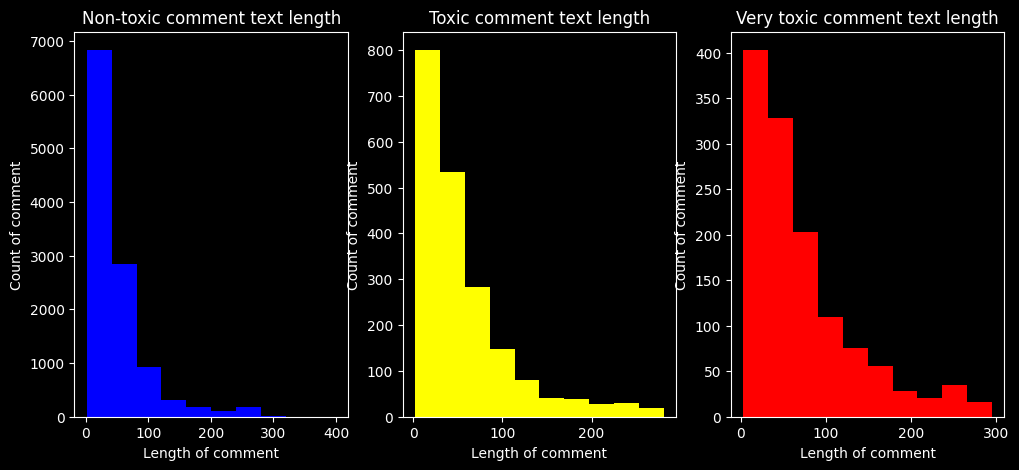

In [33]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,5))
plt.style.use('dark_background')
text_len=data[data['Label']==0]['text'].apply(len)
ax1.hist(text_len,color='blue')
ax1.set_xlabel('Length of comment')
ax1.set_ylabel('Count of comment')
ax1.set_title('Non-toxic comment text length')

text_len=data[data['Label']==1]['text'].apply(len)
ax2.hist(text_len,color='yellow')
ax2.set_xlabel('Length of comment')
ax2.set_ylabel('Count of comment')
ax2.set_title('Toxic comment text length')

text_len=data[data['Label']==2]['text'].apply(len)
ax3.hist(text_len,color='red')
ax3.set_xlabel('Length of comment')
ax3.set_ylabel('Count of comment')
ax3.set_title('Very toxic comment text length')

plt.show()

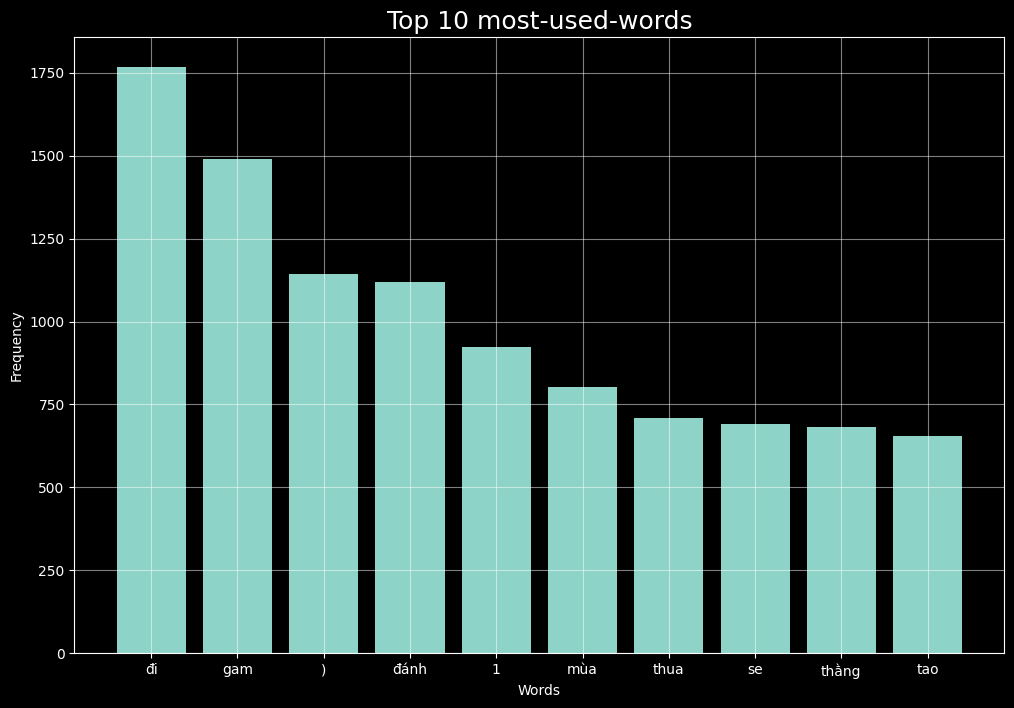

In [34]:
import collections
words = []

for text in data_train:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))
plt.style.use('dark_background')
plt.figure(figsize = (12, 8))
plt.bar(range(len(top_words)), list(top_words.values()), align='center')
plt.xticks(range(len(top_words)), list(top_words.keys()))
plt.grid(alpha = 0.5)
plt.title('Top 10 most-used-words', fontsize = 18)
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.show()

Text(0.5, 9.444444444444438, 'Token Count')

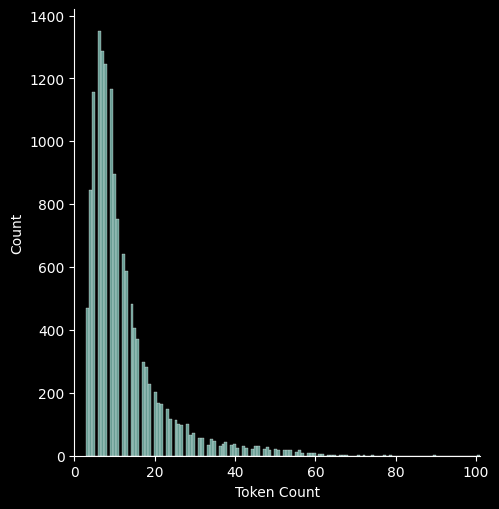

In [35]:
encoded_text = [tokenizer.encode(text, add_special_tokens=True) for text in data['Comment']]
token_lens = [len(text) for text in encoded_text]
sns.displot(token_lens)
plt.xlim([0,max(token_lens)])
plt.xlabel('Token Count')

##Spliting Data - Thực hiện phân chia tập dữ liệu thành tập Train và tập Test

- Tỉ lệ giữa tập Train và Test là 80:20

In [36]:
X = np.array(data['Comment'])
Y = np.array(data['Label'])

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.20, random_state = 0, shuffle = True)

In [37]:
print ("Thống kê số lượng dữ liệu của tập Train và tập Test")

print ("Tập train")
print ("Kích thước tập Train:",xtrain.shape)
for i in range (len(label_name)):
    print(label_name[i],":",np.count_nonzero(ytrain==i))
print('-' * 55)
print ("Tập test")
print ("Kích thước tập Test:",xtest.shape)
for i in range(len(label_name)):
    print(label_name[i],":",np.count_nonzero(ytest==i))

Thống kê số lượng dữ liệu của tập Train và tập Test
Tập train
Kích thước tập Train: (11743,)
0 : 9100
1 : 1596
2 : 1047
-------------------------------------------------------
Tập test
Kích thước tập Test: (2936,)
0 : 2301
1 : 406
2 : 229


#Chuyển text về vector (chọn 1 trong 2)

In [38]:
cv = CountVectorizer()

xtrain_transform = cv.fit_transform(xtrain)
xtest_transform = cv.transform (xtest)

In [39]:
tf = TfidfVectorizer()
xtrain_transform = tf.fit_transform(xtrain)
xtest_transform = tf.transform (xtest)

# New Section

In [40]:
# !pip install --upgrade transformers datasets


# Electra


In [41]:
# !pip install --upgrade transformers

In [42]:
# import transformers
# print(transformers.__version__)

In [43]:
# # Xóa dấu cách dư ở tên cột
# data.columns = data.columns.str.strip()

In [44]:
# # các cột thực sự có trong file Dataset.csv:
# print(data.columns)

In [45]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from datasets import Dataset

# # Đọc dữ liệu từ file
# # link_data = '/content/drive/MyDrive/IE304/Dataset.csv'
# # data = pd.read_csv(link_data)
# # Tách train/validation
# train_texts, val_texts, train_labels, val_labels = train_test_split(
#     data["Comment"].tolist(), data["Label"].tolist(), test_size=0.2, random_state=42
# )

# # Đưa vào Dataset của HuggingFace
# train_dataset = Dataset.from_dict({"text": train_texts, "label": train_labels})
# val_dataset = Dataset.from_dict({"text": val_texts, "label": val_labels})

In [46]:
# def tokenize_function(examples):
#     return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

# train_dataset = train_dataset.map(tokenize_function, batched=True)
# val_dataset = val_dataset.map(tokenize_function, batched=True)

# train_dataset = train_dataset.remove_columns(["text"])
# val_dataset = val_dataset.remove_columns(["text"])
# train_dataset.set_format("torch")
# val_dataset.set_format("torch")


##Fine tuning

In [47]:
import torch.nn as nn
from torch.optim import AdamW
from torch.utils.data import Dataset, DataLoader
from transformers import get_linear_schedule_with_warmup


In [48]:
# # Load ELECTRA model & tokenizer
# electra_model = AutoModel.from_pretrained("NlpHUST/ner-vietnamese-electra-base")
# electra_tokenizer = AutoTokenizer.from_pretrained("NlpHUST/ner-vietnamese-electra-base")

In [49]:
class CommentDataset(Dataset):
    def __init__(self, df, tokenizer, max_len=30):
        self.df = df
        self.max_len = max_len
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        row = self.df.iloc[index]
        text, label = self.get_input_data(row)

        encoding = self.tokenizer.encode_plus(
            text,
            truncation=True,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_attention_mask=True,
            return_token_type_ids=False,
            return_tensors='pt',
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_masks': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(label, dtype=torch.long),
        }

    def get_input_data(self, row):
        text = row['Comment']
        label = row['Label']
        return text, label

In [50]:
# Model
# class CommentClassifier(nn.Module):
#     def __init__(self, n_classes):
#         super(CommentClassifier, self).__init__()
#         self.bert = electra_model                                         ######
#         self.drop = nn.Dropout(p=0.3)
#         self.fc = nn.Linear(self.bert.config.hidden_size, n_classes)
#         nn.init.normal_(self.fc.weight, std=0.02)
#         nn.init.normal_(self.fc.bias, 0)

#     def forward(self, input_ids, attention_mask):
#         last_hidden_state, output = self.bert(
#             input_ids=input_ids,
#             attention_mask=attention_mask,
#             return_dict=False
#         )

#         x = self.drop(output)
#         x = self.fc(x)
#         return x
                                    ####
# class CommentClassifier(nn.Module):
#     def __init__(self, n_classes):
#         super(CommentClassifier, self).__init__()
#         self.bert = ElectraModel.from_pretrained('google/electra-base-discriminator')       ################
#         self.drop = nn.Dropout(p=0.3)
#         self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

#     def forward(self, input_ids, attention_mask):
#         outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
#         last_hidden_state = outputs[0]  # output dạng tuple, phần tử đầu tiên là last_hidden_state
#         pooled_output = last_hidden_state[:, 0, :]  # lấy token [CLS] đầu tiên
#         output = self.drop(pooled_output)
#         return self.out(output)

# Định nghĩa model
class CommentClassifier(nn.Module):
    def __init__(self, n_classes):
        super(CommentClassifier, self).__init__()
        # self.bert = electra_model  # dùng model đã tải
        # self.bert = model  # dùng model đã tải
        self.bert = AutoModel.from_pretrained(model_name)
        self.drop = nn.Dropout(p=0.3)
        self.fc = nn.Linear(self.bert.config.hidden_size, n_classes)
        nn.init.normal_(self.fc.weight, std=0.02)
        nn.init.normal_(self.fc.bias, 0)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            return_dict=True
        )
        cls_output = outputs.last_hidden_state[:, 0, :]  # lấy token CLS
        # cls_output = outputs[0][:, 0, :]  # lấy token [CLS] ở vị trí đầu tiên
        x = self.drop(cls_output)
        x = self.fc(x)
        return x

##Load Model

In [51]:
from transformers import AutoModel, AutoTokenizer  # Đảm bảo đã import đúng

# CHANGED: Tải mô hình ELECTRA thay vì PhoBERT
# electra_model = AutoModel.from_pretrained("NlpHUST/ner-vietnamese-electra-base")  # CHANGED
# electra_tokenizer = AutoTokenizer.from_pretrained("NlpHUST/ner-vietnamese-electra-base")  # CHANGED

# Gán tokenizer để dùng trong Dataset
# tokenizer = electra_tokenizer  # CHANGED

# Thiết bị
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Khởi tạo mô hình
model = CommentClassifier(n_classes=3)
model.to(device)  # CHANGED: đảm bảo đưa model lên GPU nếu cần


CommentClassifier(
  (bert): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(62000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), e

##Tạo hàm train và val

In [52]:
import numpy as np

criterion = nn.CrossEntropyLoss()
# optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)

# from torch.optim import AdamW  # Đây là bản của PyTorch
optimizer = AdamW(model.parameters(), lr=2e-5)  # Bỏ correct_bias

def train(model, criterion, optimizer, train_loader):
    model.train()
    losses = []
    correct = 0

    for data in train_loader:
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_masks'].to(device)
        targets = data['targets'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)

        loss = criterion(outputs, targets)
        _, pred = torch.max(outputs, dim=1)

        correct += torch.sum(pred == targets)
        losses.append(loss.item())
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        lr_scheduler.step()

    print(f'Train Accuracy: {correct.double()/len(train_loader.dataset)} Loss: {np.mean(losses)}')

def eval(test_data=False):
    model.eval()
    losses = []
    correct = 0

    with torch.no_grad():
        data_loader = test_loader if test_data else valid_loader
        for data in data_loader:
            input_ids = data['input_ids'].to(device)
            attention_mask = data['attention_masks'].to(device)
            targets = data['targets'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)

            _, pred = torch.max(outputs, dim=1)

            loss = criterion(outputs, targets)
            correct += torch.sum(pred == targets)
            losses.append(loss.item())

    if test_data:
        print(f'Test Accuracy: {correct.double()/len(test_loader.dataset)} Loss: {np.mean(losses)}')
        return correct.double()/len(test_loader.dataset)
    else:
        print(f'Valid Accuracy: {correct.double()/len(valid_loader.dataset)} Loss: {np.mean(losses)}')
        return correct.double()/len(valid_loader.dataset)


In [53]:
from sklearn.model_selection import train_test_split

def prepare_loaders(df):
    df_train, df_test = train_test_split(df, test_size=0.20, random_state=0, shuffle=True)
    df_train, df_valid = train_test_split(df_train, test_size=0.125, random_state=0, shuffle=True)

    train_dataset = CommentDataset(df_train, tokenizer, max_len=30)
    valid_dataset = CommentDataset(df_valid, tokenizer, max_len=30)
    test_dataset = CommentDataset(df_test, tokenizer, max_len=30)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
    valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=True, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=2)

    return train_loader, valid_loader, test_loader


In [54]:
best_acc = 0

##Bắt đầu train

In [55]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
EPOCHS = 2
model = model.to(device)

In [56]:
# from transformers import AutoModel, AutoTokenizer

# electra_model = AutoModel.from_pretrained("NlpHUST/ner-vietnamese-electra-base")
# tokenizer = AutoTokenizer.from_pretrained("NlpHUST/ner-vietnamese-electra-base")

In [ ]:
train_loader, valid_loader,test_loader = prepare_loaders(data)

criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=2e-5)

lr_scheduler = get_linear_schedule_with_warmup(
            optimizer,
            num_warmup_steps=0,
            num_training_steps=len(train_loader)*EPOCHS
        )
for epoch in range(EPOCHS):
    print(f'Epoch {epoch+1}/{EPOCHS}')
    print('-'*30)

    train(model, criterion, optimizer, train_loader)
    val_acc = eval()

    if val_acc > best_acc:
        torch.save(model.state_dict(), 'electra.pth')
        best_acc = val_acc

Epoch 1/2
------------------------------


##Pred && Eval

In [ ]:
y = []
y_ = []

train_loader, valid_loader,test_loader = prepare_loaders(data)
# Đánh giá mô hình trên tập test
model.eval()
with torch.no_grad():
        data_loader = test_loader
        for dat in data_loader:
            input_ids = dat['input_ids'].to(device)
            attention_mask = dat['attention_masks'].to(device)
            targets = dat['targets'].to(device)
            for i in targets:
                y.append(i)
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            _, pred = torch.max(outputs, dim=1)
            for i in pred:
                y_.append(i)

In [ ]:

# In kết quả đánh giá
print(f"✅ Accuracy ELECTRA: {accuracy_score(y, y_)}")
print(classification_report(y, y_))

In [ ]:

print("📊 Metrics:")
print("Precision:", precision_score(y, y_, average='macro'))
print("Recall:", recall_score(y, y_, average='macro'))
print("F1:", f1_score(y, y_, average='macro'))

In [ ]:
# Confusion Matrix
cf = confusion_matrix(y, y_)
label_name = ['Non Toxic', 'Toxic', 'Very Toxic']
sns.set(font_scale=1.)
sns.heatmap(cf, annot=True, xticklabels=label_name, yticklabels=label_name,
            annot_kws={"size": 12}, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - ELECTRA Model", fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.show()

In [ ]:
# Xem những câu dự đoán sai
sentence_difference = []
predict_label = []
true_label = []

for i in range(len(y_)):
    if y_[i] != y[i]:
        sentence_difference.append(xtest[i])  # Giả sử xtest là danh sách câu gốc
        true_label.append(y[i])
        predict_label.append(y_[i])

# Lưu vào dataframe
df_differ = pd.DataFrame({
    "Sentence": sentence_difference,
    "Predict": predict_label,
    "True": true_label
})

# Tuỳ chọn: lưu lại file nếu cần
# df_differ.to_csv("/content/differ_in_predict.csv", index=False)

df_differ

In [ ]:
model = CommentClassifier(n_classes = 3)
model.load_state_dict(torch.load('electra.pth'))

In [ ]:
!cp  '/content/drive/MyDrive/IE304/electra.pth' '/content/electra.pth'

In [ ]:
!ls '/content/drive/MyDrive/IE304/'

In [ ]:
!ls electra.pth

In [ ]:
!pwd

In [ ]:
!ls